Instructions for updating:
non-resource variables are not supported in the long term
Epoch:0, RMSE = 643.9146, 기울기a1 = 7.9995, 기울기a2 = 8.0295, y절편 = 80.6891
Epoch:1000, RMSE = 41.3967, 기울기a1 = 0.4392, 기울기a2 = 5.1141, y절편 = 80.5873
Epoch:2000, RMSE = 41.3817, 기울기a1 = 0.3908, 기울기a2 = 5.1985, y절편 = 80.5854
[0.39084186]
[5.19852579]
[80.58538604]


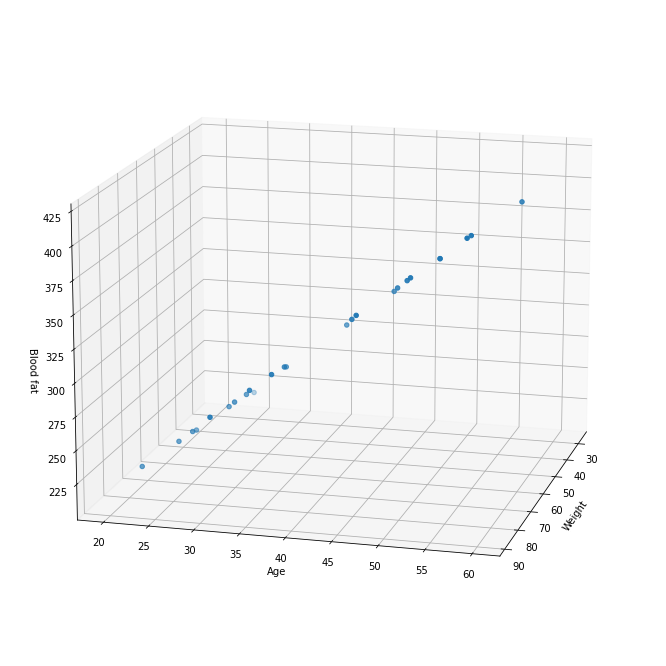

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

data = np.loadtxt("C:/Users/tiger/Deeplearning/Blood_fat.csv", delimiter=",")

x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))

y2 = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y2)))

lr = 0.001
epoch = 2001

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(epoch):
        sess.run(gradient_decent)
        if step % 1000 ==0:
            print("Epoch:%.f, RMSE = %.04f, 기울기a1 = %.4f, 기울기a2 = %.4f, y절편 = %.4f"
                  %(step, sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))
        if step == epoch-1:
            #2개의 기울기와 절편을 텐서에서 변수에 할당
            da1 = sess.run(a1)
            da2 = sess.run(a2)
            db = sess.run(b)
            print(da1)
            print(da2)
            print(db)

calc_y = []
for i in range(25):
    new_y = (da1*x1[i])+(da2*x2[i])+db
    calc_y.append(new_y)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d') 
ax.scatter(x1,x2,calc_y)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()